<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/practice_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0" #use the old version

     |████████████████████████████████| 753.4MB 19kB/s 
     |████████████████████████████████| 4.0MB 49.8MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [2]:
!pip install ipdb 
from ipdb import set_trace as st

  Created wheel for ipdb: filename=ipdb-0.13.4-cp36-none-any.whl size=10973 sha256=a8502fab1dc81d924726df8e7b4f868dd751aed49630ee6df3727f318d799b9d
  Stored in directory: /root/.cache/pip/wheels/56/51/e4/c91c61e3481a1a967beb18c4ea7a2b138a63cce94170b2e206
Successfully built ipdb


In [2]:
!pip freeze | grep fastai

fastai==1.0.61


In [3]:
from fastai import *
from fastai.vision import *
from PIL import *

In [4]:
from random import randint

In [5]:
path = untar_data(URLs.IMAGENETTE)
path.ls()

[PosixPath('/root/.fastai/data/imagenette2/val'),
 PosixPath('/root/.fastai/data/imagenette2/train')]

In [6]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imagenette2/train/n03000684'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03417042'),
 PosixPath('/root/.fastai/data/imagenette2/train/n02102040'),
 PosixPath('/root/.fastai/data/imagenette2/train/n01440764'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03888257'),
 PosixPath('/root/.fastai/data/imagenette2/train/n02979186'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03028079'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03425413'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03394916')]

In [ ]:
# (path/'train').ls(), (path/'val').ls()
img = open_image((path/'train'/'n03445777').ls()[0])
# img.show()
# img.data.shape
(path/'train'/'n03445777').ls()[:10]

[PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_4098.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_7146.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/ILSVRC2012_val_00007755.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_12489.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_5398.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_12303.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_6195.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_8839.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_7277.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2/train/n03445777/n03445777_9379.JPEG')]

In [5]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
src = ImageList.from_folder(path, include = ['images'])

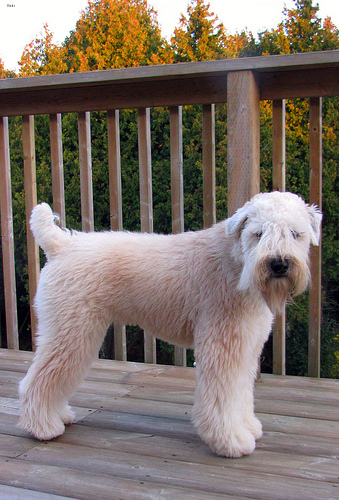

In [7]:
#test
img_path = src.items[0]
image = Image.open(img_path)
size = image.size
image

In [8]:
from PIL import Image, ImageDraw, ImageFont

In [15]:
Image.BICUBIC

3

In [16]:
!pwd

/content


In [111]:
#test
im = image
draw = ImageDraw.Draw(im)
draw.text((20, 30), "indiana jones and the last crusade", fill = (0,0,0))
# im
targ_size = resize_to(im, 95)
# print(targ_size, im.size)
im = im.resize(targ_size)
# print(im.size)
dest = Path('/content/sample_data')
im.save(dest/'new.jpg', quality = 10)

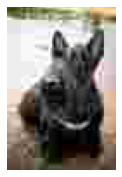

In [19]:
#test
test = open_image(Path('/content/sample_data/new.jpg'))
show_image(test)

In [ ]:
#test
bat = nn.BatchNorm2d(2)
ps = []
for i in bat.parameters():
  ps.append(i)
len(ps)
# ps[0].shape, ps[1].shape
# bat.__dict__
nb = torch.randn((3, 2, 4, 4))
res = bat(nb)
# res, nb

In [ ]:
tuple([i for i in range(3)])

(0, 1, 2)

In [20]:
#test
im_path = src.items[0]
image = Image.open(im_path)
print(image.size)
targ_size = resize_to(image, targ_sz = 96, use_min = True)
targ_size
image = image.resize(targ_size, resample = 2)
draw = ImageDraw.Draw(image)
x, y = targ_size
draw.text((randint(1, x), randint(1, y)), str(randint(10, 100)), fill=tuple([randint(128, 255) for i in range(3)]))


(333, 500)


In [21]:
#test
im_path.name

'scottish_terrier_46.jpg'

In [9]:
def crappify(im_path, *args):
  try:
    dest = path_lr/im_path.relative_to(path_hr)
    image = Image.open(im_path).convert('RGB')
    x, y = resize_to(image, 96, use_min= True)
    image = image.resize((x, y), resample = 2)
    q = randint(10, 70)
    ImageDraw.Draw(image).text((randint(0, x), randint(0, y)), str(randint(0, 100)), fill=tuple([randint(128, 255) for i in range(3)])) 
    
  except Exception as e:
    print(e)
    return
  try:
    image.save(dest, quality = q)
  except Exception as e:
    st()

In [10]:
import shutil     

In [11]:
# (path/'images').ls()[:10]
path_hr = path/'images'
path_lr = path/'low_res' 
# shutil.rmtree(path_lr)
path_lr.mkdir(parents = True, exist_ok = True)
# path_lr.ls()[:10]

In [30]:
# test
c = 0
for i in src.items:
  crappify(i)
  c += 1
  if c%500 == 0:
    print("rounds")

rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds
rounds


In [12]:
parallel(crappify, src.items)

In [16]:
#test
len(src.items), len(path_lr.ls())

(7390, 7390)

In [13]:
src = ImageImageList.from_folder(path_lr).split_by_rand_pct().label_from_func(lambda x: path_hr/x.name)
src

LabelLists;

Train: LabelList (5912 items)
x: ImageImageList
Image (3, 96, 96),Image (3, 96, 115),Image (3, 96, 144),Image (3, 96, 144),Image (3, 144, 96)
y: ImageList
Image (3, 496, 500),Image (3, 414, 500),Image (3, 333, 500),Image (3, 333, 500),Image (3, 500, 333)
Path: /root/.fastai/data/oxford-iiit-pet/low_res;

Valid: LabelList (1478 items)
x: ImageImageList
Image (3, 96, 144),Image (3, 128, 96),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: ImageList
Image (3, 333, 500),Image (3, 500, 375),Image (3, 375, 500),Image (3, 375, 500),Image (3, 375, 500)
Path: /root/.fastai/data/oxford-iiit-pet/low_res;

Test: None

In [39]:
size, bs = 96, 8

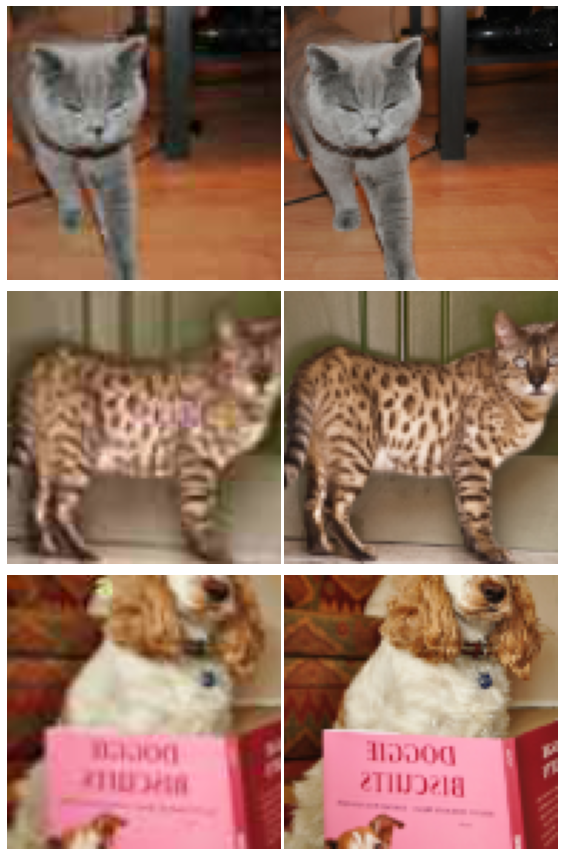

In [14]:
data = src.transform(get_transforms(max_rotate = 5.0), tfm_y = True, size = 96).databunch(bs = 8).normalize(imagenet_stats)
data.show_batch(rows = 3)

In [15]:
#test
im = data.train_ds[0][0]
torch.min(im.data), torch.max(im.data)

(tensor(7.7921e-08), tensor(0.9983))

In [38]:
#test
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
Path: /root/.fastai/data/oxford-iiit-pet/low_res;

Valid: LabelList (1478 items)
x: ImageImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
Path: /root/.fastai/data/oxford-iiit-pet/low_res;

Test: None

In [23]:
loss_gen = MSELossFlat()
wd = 1e-03
# y_range = (-3.,3.)
arch = models.resnet34

In [28]:
learn = unet_learner(data, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, loss_func=loss_gen)

In [ ]:
def create_gan_learner():
  return unet_learner(data, arch, wd=wd, blur=True, norm_type=NormType.Weight, self_attention=True, loss_func=loss_gen)
learn = create_gan_learner()

In [29]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


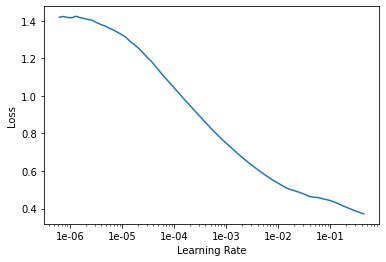

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(4, max_lr= slice(1e-03, 1e-01))

epoch,train_loss,valid_loss,time
0,2400.042236,0.028739,01:00
1,0.005163,0.004102,01:00
2,0.002630,0.002860,01:00
3,0.002409,0.002494,01:00


In [38]:
#test
for xb, yb in data.train_dl:
  break
xb.shape, xb.device
yhat = learn.model.eval()(xb)
yhat.shape, yhat.device
for i, j in zip(yhat, yb):
  show_image()

(torch.Size([8, 3, 96, 96]), device(type='cuda', index=0))

In [ ]:
#test
yhat = learn.pred_batch(xb)
yhat

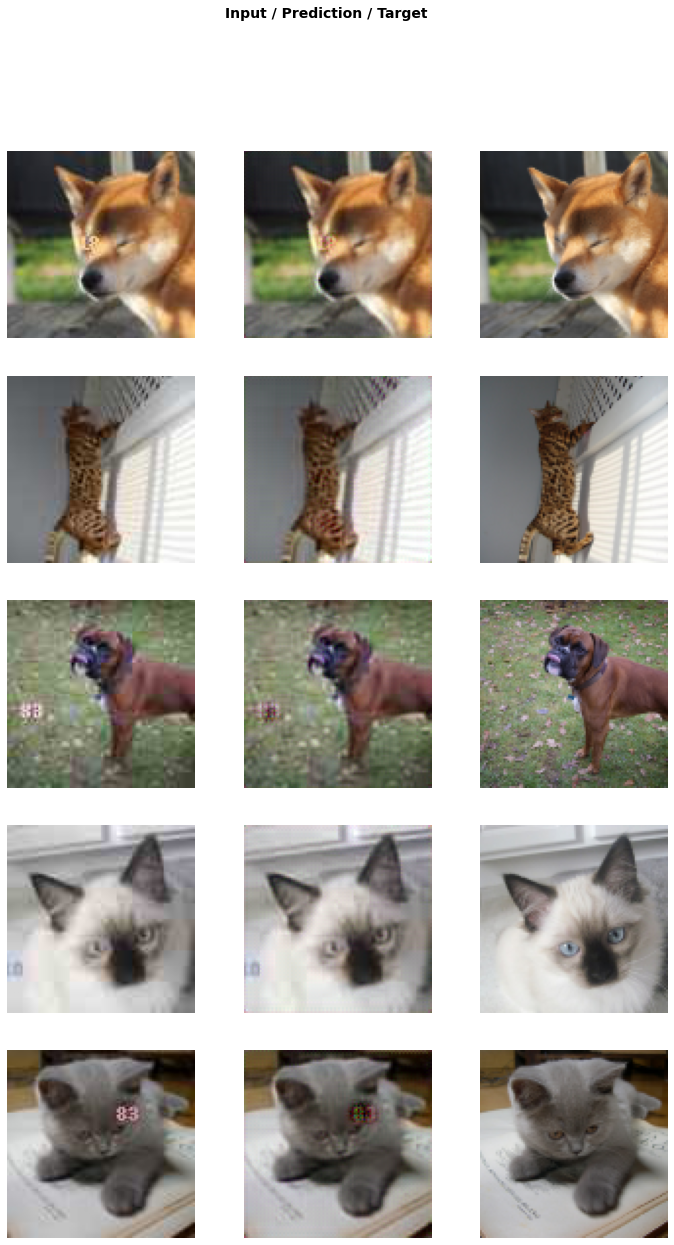

In [32]:
learn.show_results()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


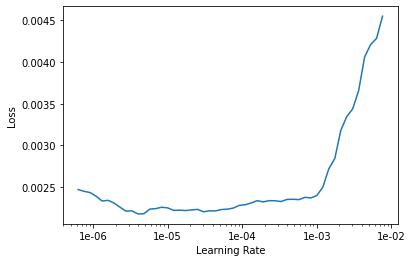

In [34]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(3, max_lr = slice(4e-06, 4e-04))

epoch,train_loss,valid_loss,time
0,0.002266,0.002327,01:05
1,0.002038,0.002147,01:05
2,0.002045,0.002112,01:05


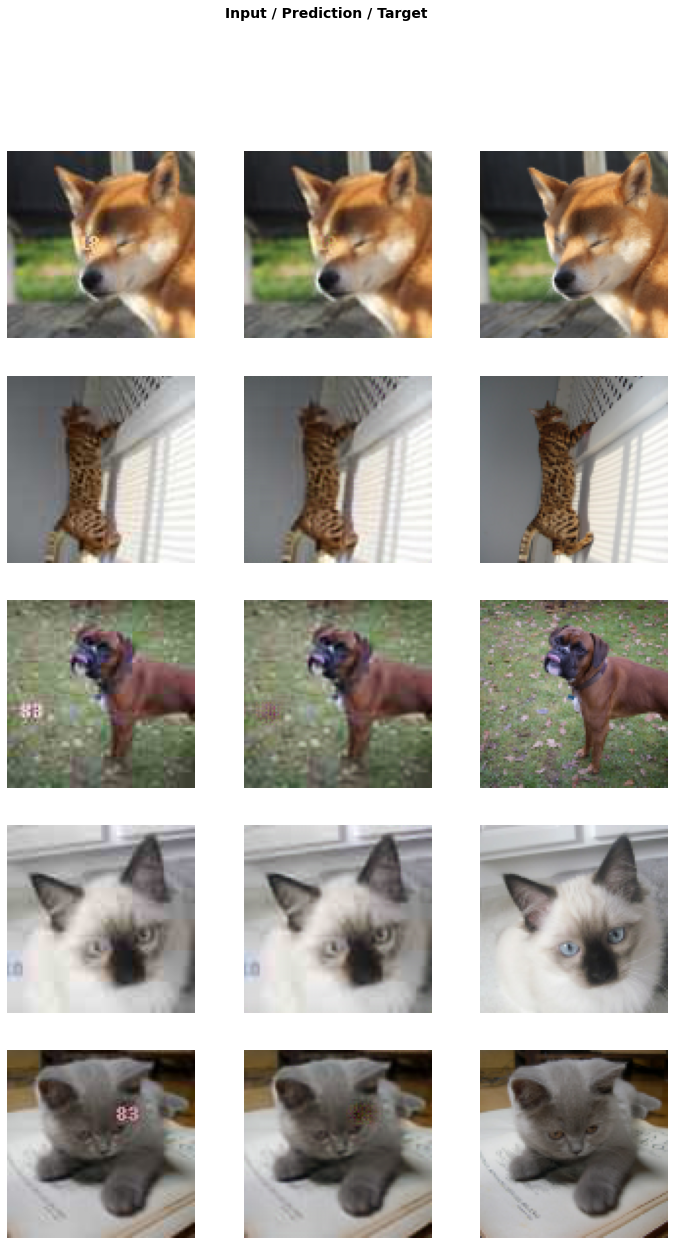

In [36]:
learn.show_results()

In [37]:
learn.save('pre_gen-2')

array([PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/wheaten_terrier_10.jpg'),
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/pomeranian_39.jpg'),
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/american_pit_bull_terrier_31.jpg'),
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/basset_hound_88.jpg'), ...,
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/shiba_inu_79.jpg'),
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/havanese_127.jpg'),
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/Bengal_58.jpg'),
       PosixPath('/root/.fastai/data/oxford-iiit-pet/low_res/Bombay_5.jpg')], dtype=object)

In [38]:
path_gen = path/'gen'
path_gen.mkdir(parents = True, exist_ok = True)

def save_preds(dl):
  items = data.items
  i = 0

  for b in dl:
    yb = learn.pred_batch(b, reconstruct= True)
    for y in yb:
      y.save(path_gen/items[i].name)
      i += 1

save_preds(data.fix_dl)

In [42]:
#test
len((path/'gen').ls()) == len((path/'images').ls())
len((path/'gen').ls()), len((path/'images').ls())

(5912, 7393)

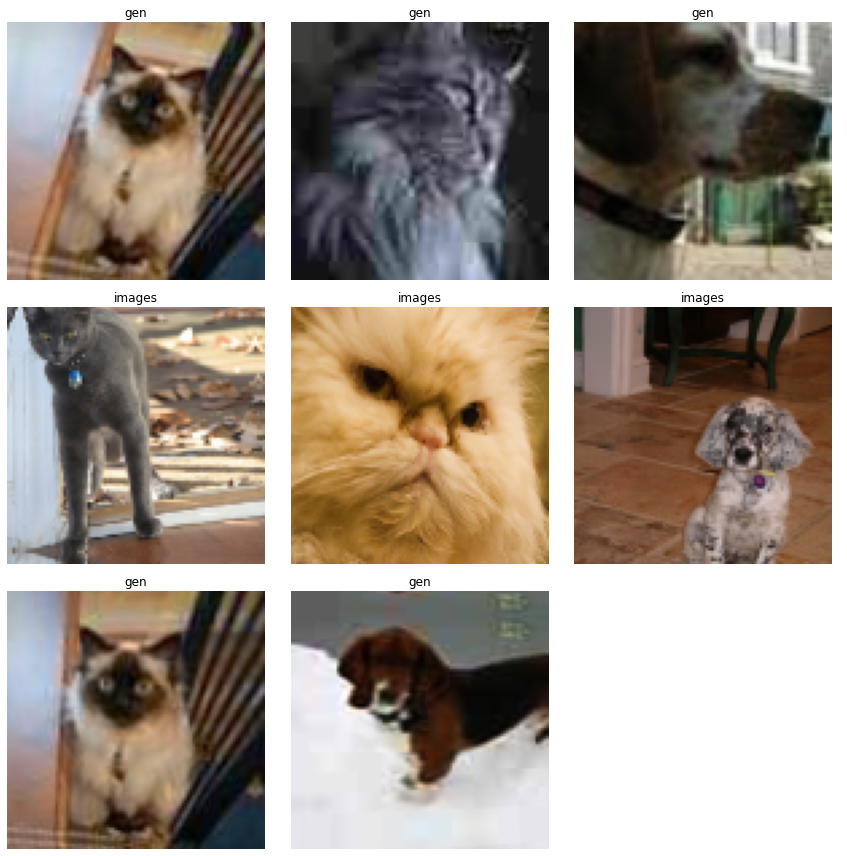

In [43]:
path.ls()
classes = ['gen', 'images'] 

def get_critic_data(classes, bs = bs, size = size):

  src = ImageList.from_folder(path, include = classes).split_by_rand_pct().label_from_folder(classes = classes)
  return src.transform(get_transforms(), size = size).databunch(bs = bs).normalize(imagenet_stats)

data_crit = get_critic_data(classes)
data_crit.show_batch(rows = 3)

In [45]:
from fastai.callbacks import *
from fastai.vision.gan import *

In [47]:
#test
gan = gan_critic().cuda()
for xb, yb in data_crit.dl():
  break
xb.shape
yhat = gan(xb)


torch.Size([8, 9])

In [48]:
#test
yhat.shape, xb.shape

(torch.Size([8, 9]), torch.Size([8, 3, 96, 96]))

In [60]:
crit_loss = AdaptiveLoss(nn.BCEWithLogitsLoss())

In [70]:
def create_critic_learner(data, loss_func, wd = wd):
  return Learner(data_crit, gan_critic(), loss_func= loss_func, wd = wd)

critic_learner = create_critic_learner(data_crit, crit_loss)
critic_learner.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


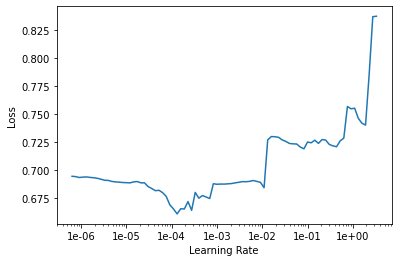

In [71]:
critic_learner.recorder.plot()

In [72]:
critic_learner.fit_one_cycle(5, max_lr= 1e-02)

epoch,train_loss,valid_loss,time
0,0.243149,0.153410,01:07
1,0.182685,0.280189,01:07
2,0.071228,0.020807,01:07
3,0.021322,0.015405,01:07
4,0.007540,0.013856,01:07


In [76]:
#test
for xb, yb in data.valid_dl:
  break
yhat = critic_learner.pred_batch(xb)
print(yhat.shape, xb.shape, yb.shape)
# loss = crit_loss(yhat, torch.zeros(64))
# loss
loss = crit_loss(yhat, torch.ones(8))
loss
# yhat

torch.Size([8, 9]) torch.Size([8, 3, 96, 96]) torch.Size([8, 3, 96, 96])


tensor(5.9924)

In [77]:
learn = None
critic_learner = None
gc.collect()

7757

In [78]:
learn = create_gan_learner()
critic_learner = create_critic_learner(data_crit, crit_loss, wd = wd)

In [79]:
switcher = partial(AdaptiveGANSwitcher, critic_thresh=0.65)
learn = GANLearner.from_learners(learn, critic_learner, weights_gen=(1.,50.), show_img=False, switcher=switcher,
                                 opt_func=partial(optim.Adam, betas=(0.,0.99)), wd=wd)
learn.callback_fns.append(partial(GANDiscriminativeLR, mult_lr=5.))

In [80]:
lr = 1e-04

In [ ]:
learn.fit(40,lr)